In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from keras.datasets import cifar10
import cv2

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_train[0].shape

(32, 32, 3)

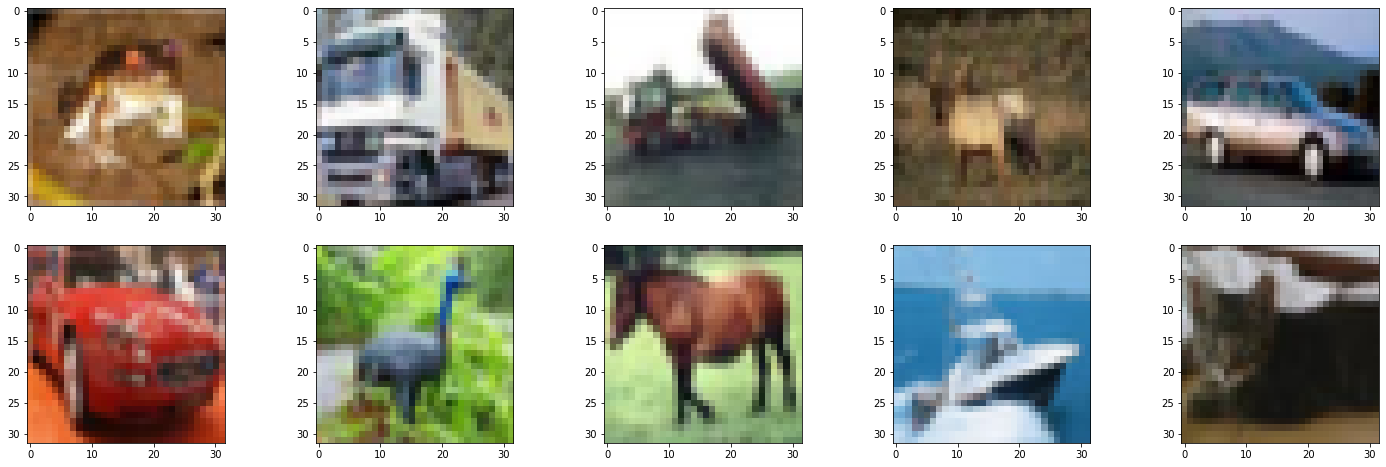

In [4]:
fig = plt.figure(figsize=(25, 8))

for i in np.arange(10):
    ax = fig.add_subplot(2, 5, i+1)
    X_train[i]
    plt.imshow(X_train[i])


In [5]:
# チャネルごとに正規化
N = X_train.shape[0]
X = X_train.reshape(N, -1)
X.shape

(50000, 3072)

In [6]:
np.mean(X, axis=0).shape

(3072,)

In [8]:
X = X - np.mean(X, axis=0)
X.shape

(50000, 3072)

In [14]:
X_corr = np.dot(X.T, X) / X.shape[0]
E, D, _ = np.linalg.svd(X_corr)
E.shape, D.shape

((3072, 3072), (3072,))

In [30]:
P = np.dot(np.diag(1. / (np.sqrt(D)+1E-6)), E.T)
P.shape

(3072, 3072)

In [31]:
def normalizeImage2(x, epsilon=1E-6):
  vmin = np.min(x)
  vmax = np.max(x)
  return (x - vmin) / (vmax - vmin + epsilon)

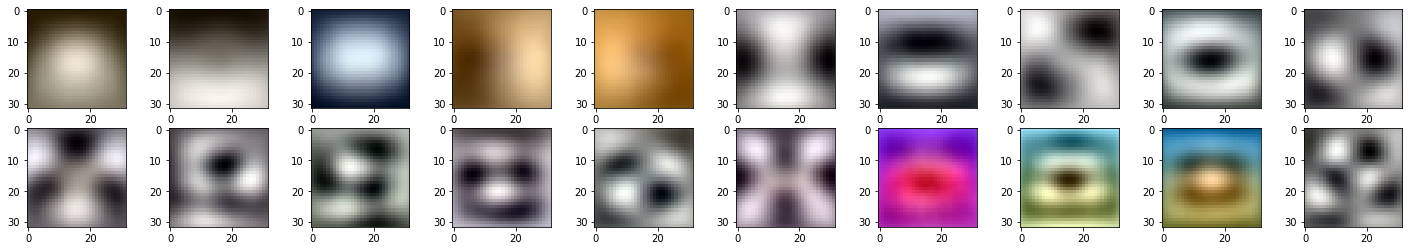

In [44]:
fig = plt.figure(figsize=(25, 4))

for i in np.arange(20):
    ax = fig.add_subplot(2, 10, i+1)
    plt.imshow(normalizeImage2(P[i,:]).reshape(32, 32, 3))

In [41]:
np.min(P[0]) >  0, np.max(P[0])

(-1.661613912869224e-05, 8.631308802151854e-08)

In [21]:
class PCAWhitening:
  def __init__(self, epsilon=1E-6):
    self.epsilon = epsilon
    self.mean = None
    self.eigenvalue = None
    self.eigenvector = None
    self.pca = None
  
  def fit(self, x):
    self.mean = np.mean(x, axis=0)
    x_ = x - self.mean
    cov = np.dot(x_.T, x_) / x_.shape[0]
    E, D, _ = np.linalg.svd(cov)
    D = np.sqrt(D) + self.epsilon
    self.eigenvalue = D
    self.eigenvector = E
    self.pca = np.dot(np.diag(1. / D), E.T)
    return self
            
  def transform(self, x):
    x_ = x - self.mean
    return np.dot(x_, self.pca.T)

x_pcaw.shape=(50000, 3072)


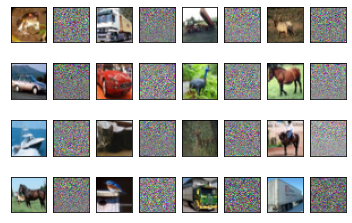

In [22]:
def normalizeImage2(x, epsilon=1E-6):
  vmin = np.min(x)
  vmax = np.max(x)
  return (x - vmin) / (vmax - vmin + epsilon)

x_pcaw = X_train.reshape(X_train.shape[0], -1)
print('x_pcaw.shape=' + str(x_pcaw.shape))
# x_pcaw.shape(50000, 3072)
pcaw = PCAWhitening().fit(x_pcaw)
x_pcaw = pcaw.transform(x_pcaw).reshape(X_train.shape)

plt.clf()
for i in range(0, 16):
  plt.subplot(4, 8, i*2+1)
  fig = plt.imshow(X_train[i,:,:,:])
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)
  plt.subplot(4, 8, i*2+2)
  fig = plt.imshow(normalizeImage2(x_pcaw[i,:,:,:]))
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

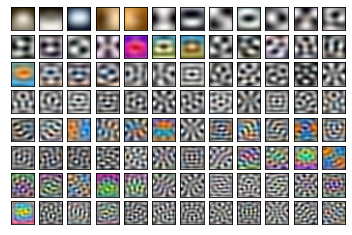

In [23]:
img = pcaw.pca
for i in range(0, 96):
  plt.subplot(8, 12, i+1)
  fig = plt.imshow(normalizeImage2(img[i,:]).reshape(32, 32, 3))
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

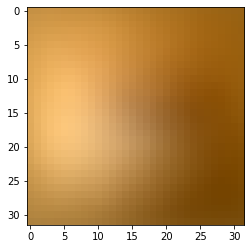

In [28]:
plt.imshow(normalizeImage2(img[4,:]).reshape(32, 32, 3))